# Stroke Prediction Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Dataset Description and Problem Definition

- The primary objective of this project is to build predictive models to identify patient who are likely to get stroke.
- This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status.
- Each row in the data provides relavant information about the patient.
1) id: unique identifier
2) gender: "Male", "Female" or "Other"
3) age: age of the patient
4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
6) ever_married: "No" or "Yes"
7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
8) Residence_type: "Rural" or "Urban"
9) avg_glucose_level: average glucose level in blood
10) bmi: body mass index
11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
12) stroke: 1 if the patient had a stroke or 0 if not

In [2]:
df = pd.read_csv("healthcare-dataset-stroke-data.csv")

In [3]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


### Exploratory Data Analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [5]:
df['gender'].unique()

array(['Male', 'Female', 'Other'], dtype=object)

In [6]:
df['hypertension'].unique()

array([0, 1])

In [7]:
df['heart_disease'].unique()

array([1, 0])

In [8]:
df['ever_married'].unique()

array(['Yes', 'No'], dtype=object)

In [9]:
df['work_type'].unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [10]:
df['Residence_type'].unique()

array(['Urban', 'Rural'], dtype=object)

In [11]:
df['smoking_status'].unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

In [12]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


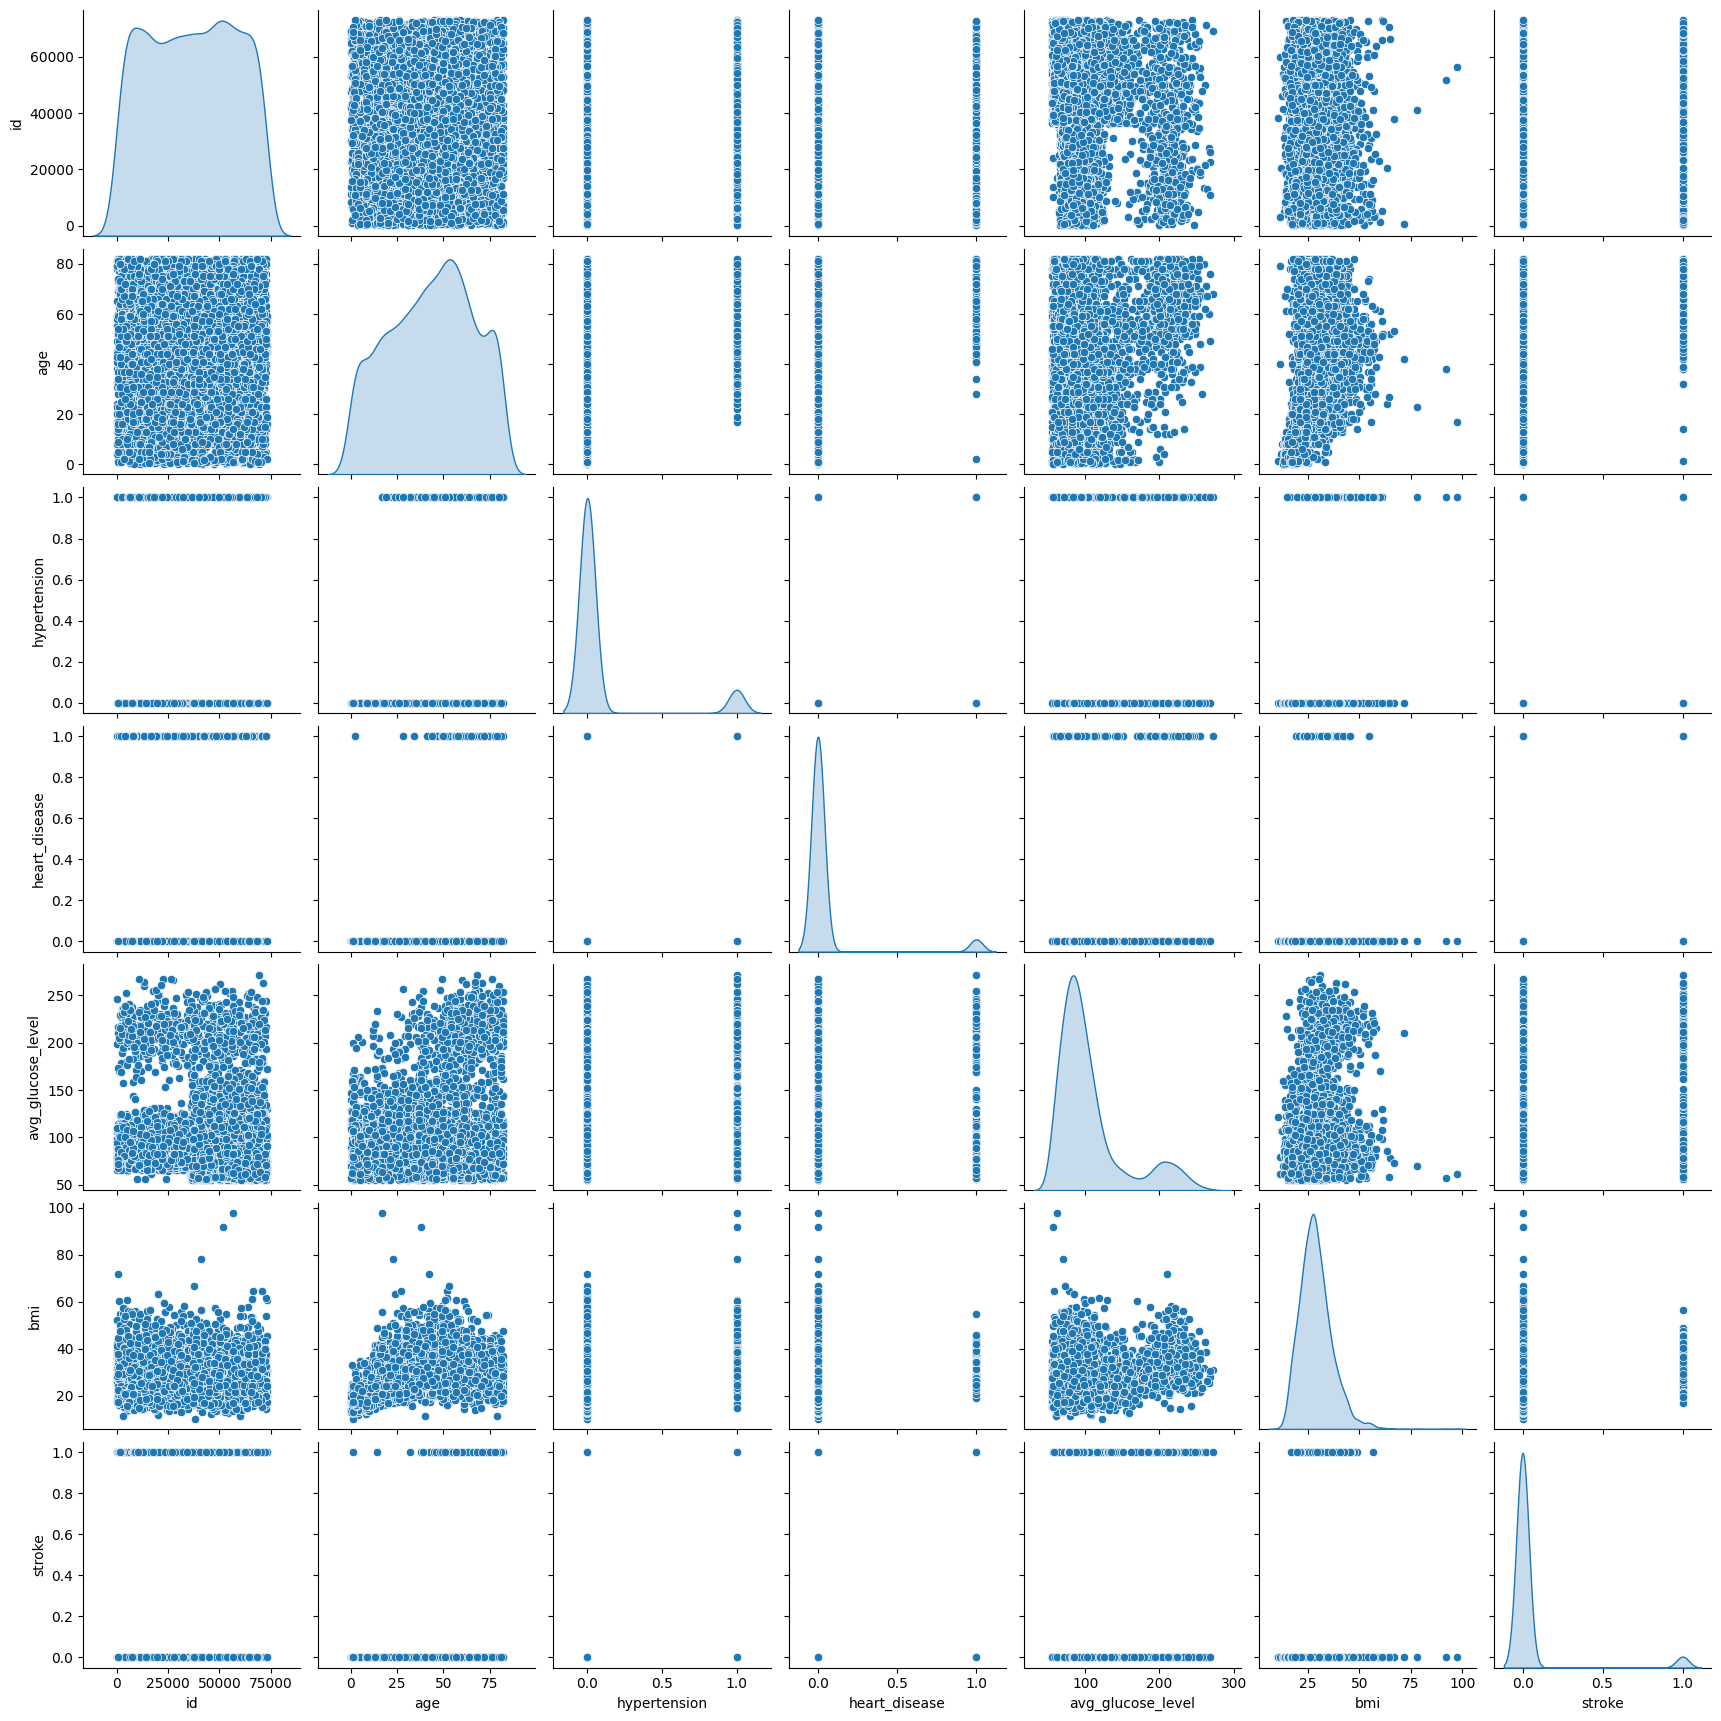

In [13]:
sns.pairplot(df, diag_kind='kde')

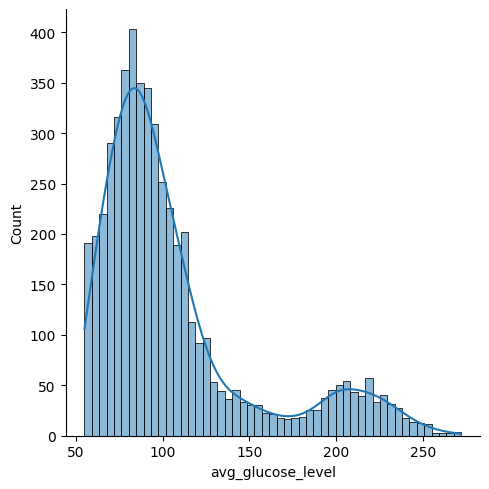

In [14]:
# There is positive Skew in avg_glucose_level
sns.displot(df, x="avg_glucose_level",kde=True)

<Axes: xlabel='age'>

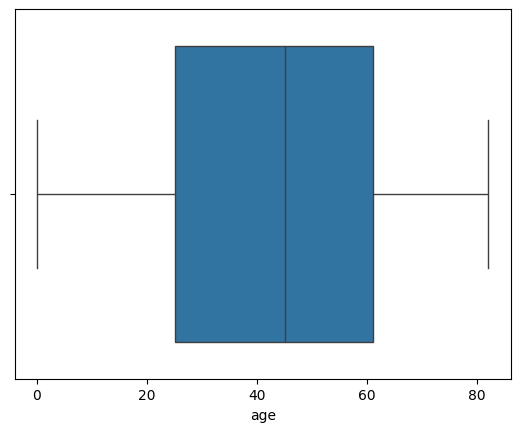

In [15]:
sns.boxplot(df,x='age')

<Axes: xlabel='avg_glucose_level'>

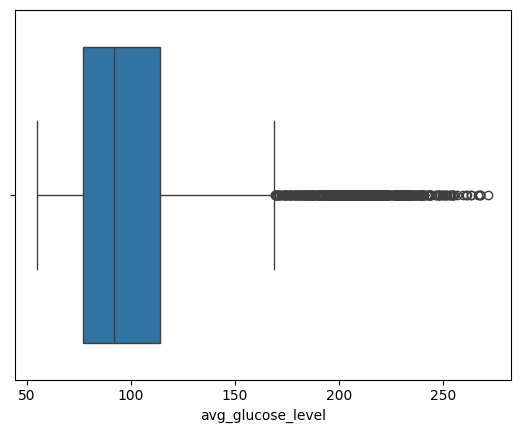

In [16]:
# There are outliers in avg_glucose_level column but we can't ignore it
sns.boxplot(df, x='avg_glucose_level')

<Axes: xlabel='bmi'>

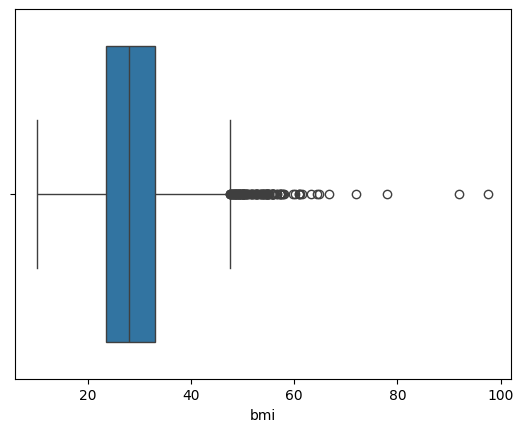

In [17]:
# There ara outliers in bmi column
sns.boxplot(df, x='bmi')

In [18]:
# There are null values in bmi column
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [19]:
# There ara Unknown values in smoking_status column
df['smoking_status'].value_counts()

smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: count, dtype: int64

In [20]:
# There is an unknown value in gender column
df['gender'].value_counts()

gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64

In [21]:
# The target label is imbalanced
df['stroke'].value_counts()

stroke
0    4861
1     249
Name: count, dtype: int64

<Axes: xlabel='stroke', ylabel='count'>

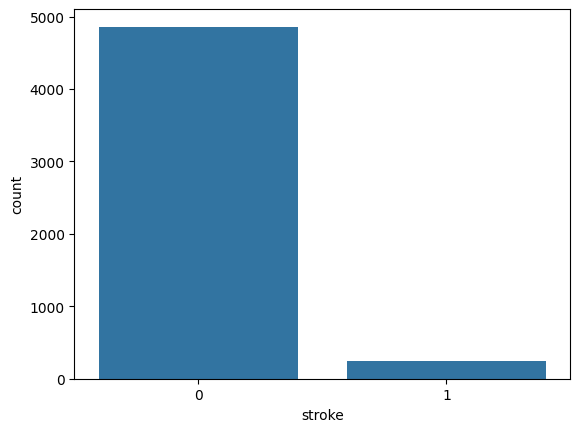

In [22]:
sns.countplot(df,x='stroke')

<Axes: >

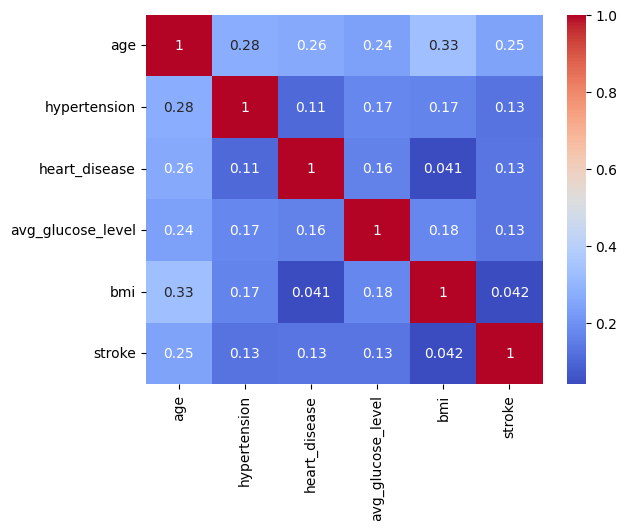

In [23]:
ndata = df[['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']].corr()
sns.heatmap(ndata, annot=True, cmap='coolwarm')

### **Data Cleaning**

In [24]:
# drop id column
df.drop(['id'], axis=1, inplace=True)

In [25]:
# drop bmi outliers
Q1 = df['bmi'].quantile(.25)
Q3 = df['bmi'].quantile(.75)
IQR = Q3 - Q1
    
minimum = Q1 - 1.5*IQR
maximum = Q3 + 1.5*IQR
    
df = df[(df['bmi'] >= minimum) & (df['bmi'] <= maximum)]

In [26]:
# Normalize avg_glucose_level column
from scipy.stats import boxcox
df['avg_glucose_level'], l = boxcox(df['avg_glucose_level'])

C:\Users\body2\AppData\Local\Temp\ipykernel_15612\1213951144.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['avg_glucose_level'], l = boxcox(df['avg_glucose_level'])


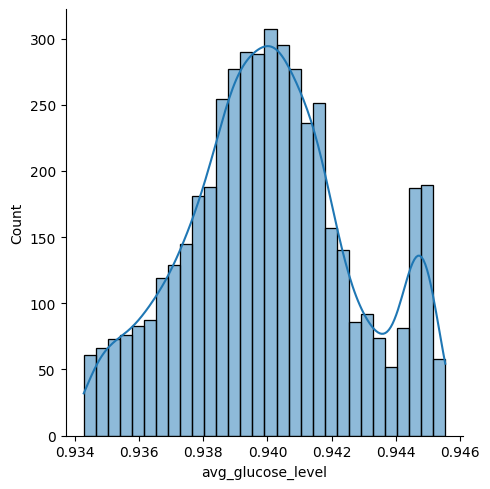

In [27]:
sns.displot(df, x='avg_glucose_level', kde=True)

In [28]:
# replace unknown values with null
df['smoking_status'] = df['smoking_status'].replace('Unknown',np.nan)
df['gender'] = df['gender'].replace('Other', np.nan)
df.dropna(subset=['gender'],inplace=True)

C:\Users\body2\AppData\Local\Temp\ipykernel_15612\2266618103.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['smoking_status'] = df['smoking_status'].replace('Unknown',np.nan)
C:\Users\body2\AppData\Local\Temp\ipykernel_15612\2266618103.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['gender'] = df['gender'].replace('Other', np.nan)
C:\Users\body2\AppData\Local\Temp\ipykernel_15612\2266618103.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See 

### preprocessing

In [29]:
# Encoding gender column
df['gender'] = df['gender'].map({"Male":1, "Female":0})

C:\Users\body2\AppData\Local\Temp\ipykernel_15612\2590234814.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['gender'] = df['gender'].map({"Male":1, "Female":0})


In [30]:
# Encoding ever_married column
df["ever_married"] = df["ever_married"].map({'Yes':1, 'No':0})

C:\Users\body2\AppData\Local\Temp\ipykernel_15612\770977391.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["ever_married"] = df["ever_married"].map({'Yes':1, 'No':0})


In [31]:
# Encoding Residence_type column
df["Urban"] = df["Residence_type"].map({'Urban':1, 'Rural':0})
df.drop(["Residence_type"], axis=1, inplace=True)

C:\Users\body2\AppData\Local\Temp\ipykernel_15612\313745532.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Urban"] = df["Residence_type"].map({'Urban':1, 'Rural':0})
C:\Users\body2\AppData\Local\Temp\ipykernel_15612\313745532.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(["Residence_type"], axis=1, inplace=True)


In [32]:
# Encoding smoking_status column
df["smoking_status"] = df["smoking_status"].map({'never smoked':0, 'formerly smoked':1, 'smokes':2})

C:\Users\body2\AppData\Local\Temp\ipykernel_15612\3699124942.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["smoking_status"] = df["smoking_status"].map({'never smoked':0, 'formerly smoked':1, 'smokes':2})


In [33]:
# Encoding work_type column
one_hot = pd.get_dummies(df['work_type'],dtype=int)
df.drop(columns='work_type',axis=1,inplace=True)
df = df.join(one_hot)

C:\Users\body2\AppData\Local\Temp\ipykernel_15612\505145123.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns='work_type',axis=1,inplace=True)


In [34]:
df

,gender,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,smoking_status,stroke,Urban,Govt_job,Never_worked,Private,Self-employed,children
0,1,67.0,0,1,1,0.945017,36.6,1.0,1,1,0,0,1,0,0
2,1,80.0,0,1,1,0.941162,32.5,0.0,1,0,0,0,1,0,0
3,0,49.0,0,0,1,0.943918,34.4,2.0,1,1,0,0,1,0,0
4,0,79.0,1,0,1,0.943991,24.0,0.0,1,0,0,0,0,1,0
5,1,81.0,0,0,1,0.944272,29.0,1.0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5104,0,13.0,0,0,0,0.940960,18.6,NaN,0,0,0,0,0,0,1
5106,0,81.0,0,0,1,0.942283,40.0,0.0,0,1,0,0,0,1,0
5107,0,35.0,0,0,1,0.939127,30.6,0.0,0,0,0,0,0,1,0
5108,1,51.0,0,0,1,0.943787,25.6,1.0,0,0,0,0,1,0,0


### KNN Imputation

In [35]:
from sklearn.impute import KNNImputer

In [36]:
Imputer = KNNImputer(n_neighbors=5)
imputed_data = Imputer.fit_transform(df)

In [37]:
df = pd.DataFrame(imputed_data, columns = df.columns)
df['smoking_status'] = np.round(df['smoking_status'])

### Balance the data

In [38]:
from imblearn.over_sampling import RandomOverSampler

In [39]:
X = df.drop("stroke", axis=1)
Y = df["stroke"]

In [40]:
ros = RandomOverSampler(random_state=41)
X_ros, Y_ros = ros.fit_resample(X, Y)

C:\Users\body2\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
C:\Users\body2\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(


In [41]:
df = X_ros
df['stroke'] = Y_ros

In [42]:
df['stroke'].value_counts()

stroke
1.0    4591
0.0    4591
Name: count, dtype: int64

### Scaling numerical features

In [43]:
from sklearn.preprocessing import MinMaxScaler

In [44]:
scaler = MinMaxScaler()
col_to_scale = ['age', 'avg_glucose_level', 'bmi']
df[col_to_scale] = scaler.fit_transform(df[col_to_scale])

In [45]:
df

,gender,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,smoking_status,Urban,Govt_job,Never_worked,Private,Self-employed,children,stroke
0,1.0,0.816895,0.0,1.0,1.0,0.954447,0.706989,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1,1.0,0.975586,0.0,1.0,1.0,0.611562,0.596774,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.0,0.597168,0.0,0.0,1.0,0.856704,0.647849,2.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.0,0.963379,1.0,0.0,1.0,0.863206,0.368280,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,1.0,0.987793,0.0,0.0,1.0,0.888164,0.502688,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9177,0.0,0.975586,0.0,1.0,1.0,0.224111,0.306452,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
9178,1.0,0.572754,0.0,0.0,1.0,0.468751,0.827957,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
9179,0.0,0.877930,0.0,0.0,1.0,0.558299,0.446237,2.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
9180,1.0,0.902344,1.0,1.0,1.0,0.274969,0.459677,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


## Split the Data

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
X = df.drop(columns=['stroke'],axis=1)
y = df['stroke']

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Modeling and Evaluation

In [49]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

### Hard Margin SVM

In [50]:
hard_margin_svm = SVC(kernel='linear', C=1000)
hard_margin_svm.fit(X_train, y_train)

y_predH = hard_margin_svm.predict(X_test)
print(classification_report(y_test, y_predH))

y_TpredH = hard_margin_svm.predict(X_train)
train_accH = accuracy_score(y_train, y_TpredH)
print(f"Train Accuracy:{train_accH:.3f}")

              precision    recall  f1-score   support

         0.0       0.82      0.74      0.78       915
         1.0       0.76      0.84      0.80       922

    accuracy                           0.79      1837
   macro avg       0.79      0.79      0.79      1837
weighted avg       0.79      0.79      0.79      1837

Train Accuracy:0.786


### Soft Margin SVM

In [51]:
for c in [.01, .1, 1, 10, 100]:
    print(f"C = {c}")
    soft_margin_svm = SVC(kernel='linear', C=c)
    soft_margin_svm.fit(X_train, y_train)
    
    y_predS = soft_margin_svm.predict(X_test)
    print(classification_report(y_test, y_predS))
    
    y_TpredS = soft_margin_svm.predict(X_train)
    train_accS = accuracy_score(y_train, y_TpredS)
    print(f"Train Accuracy:{train_accS:.3f}")
    
    print("=======================================")

C = 0.01
              precision    recall  f1-score   support

         0.0       0.84      0.68      0.76       915
         1.0       0.74      0.88      0.80       922

    accuracy                           0.78      1837
   macro avg       0.79      0.78      0.78      1837
weighted avg       0.79      0.78      0.78      1837

Train Accuracy:0.774
C = 0.1
              precision    recall  f1-score   support

         0.0       0.82      0.72      0.77       915
         1.0       0.75      0.84      0.79       922

    accuracy                           0.78      1837
   macro avg       0.79      0.78      0.78      1837
weighted avg       0.79      0.78      0.78      1837

Train Accuracy:0.780
C = 1
              precision    recall  f1-score   support

         0.0       0.82      0.73      0.77       915
         1.0       0.76      0.84      0.80       922

    accuracy                           0.79      1837
   macro avg       0.79      0.79      0.79      1837
weighted 

Best model with c = 1

In [52]:
soft_margin_svm = SVC(kernel='linear', C=1)
soft_margin_svm.fit(X_train, y_train)

SVC(C=1, kernel='linear')

### RBF Kernel

In [53]:
for g in [.01, .1, 1, 10, 100]:
    print(f"Gamma = {g}")
    rbf_svm = SVC(kernel='rbf', gamma=g, C=1)
    rbf_svm.fit(X_train, y_train)
    
    y_pred_rbf = rbf_svm.predict(X_test)
    print(classification_report(y_test, y_pred_rbf))
    
    y_Tpred_rbf = rbf_svm.predict(X_train)
    train_acc_rbf = accuracy_score(y_train, y_Tpred_rbf)
    print(f"Train Accuracy:{train_acc_rbf:.3f}")
    
    print("=====================================")

Gamma = 0.01
              precision    recall  f1-score   support

         0.0       0.85      0.70      0.77       915
         1.0       0.75      0.88      0.81       922

    accuracy                           0.79      1837
   macro avg       0.80      0.79      0.79      1837
weighted avg       0.80      0.79      0.79      1837

Train Accuracy:0.783
Gamma = 0.1
              precision    recall  f1-score   support

         0.0       0.86      0.74      0.79       915
         1.0       0.77      0.88      0.82       922

    accuracy                           0.81      1837
   macro avg       0.82      0.81      0.81      1837
weighted avg       0.81      0.81      0.81      1837

Train Accuracy:0.801
Gamma = 1
              precision    recall  f1-score   support

         0.0       0.91      0.82      0.86       915
         1.0       0.83      0.92      0.87       922

    accuracy                           0.87      1837
   macro avg       0.87      0.87      0.87      18

Best model with gamma = 100

In [54]:
rbf_svm = SVC(kernel='rbf', gamma=100, C=1)
rbf_svm.fit(X_train, y_train)

SVC(C=1, gamma=100)

### Polynomial Kernel

In [55]:
for d in [2, 3 ,4 ,5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]:
    print(f"Degree = {d}")
    poly_svm = SVC(kernel='poly', degree=d, C=1)
    poly_svm.fit(X_train, y_train)
   
    y_pred_poly = poly_svm.predict(X_test)
    print(classification_report(y_test, y_pred_poly))
    
    y_Tpred_poly = poly_svm.predict(X_train)
    train_acc_poly = accuracy_score(y_train, y_Tpred_poly)
    print(f"Train Accuracy:{train_acc_poly:.3f}")
    
    print("=====================================")

Degree = 2
              precision    recall  f1-score   support

         0.0       0.85      0.76      0.80       915
         1.0       0.79      0.87      0.82       922

    accuracy                           0.81      1837
   macro avg       0.82      0.81      0.81      1837
weighted avg       0.82      0.81      0.81      1837

Train Accuracy:0.802
Degree = 3
              precision    recall  f1-score   support

         0.0       0.87      0.78      0.82       915
         1.0       0.80      0.88      0.84       922

    accuracy                           0.83      1837
   macro avg       0.84      0.83      0.83      1837
weighted avg       0.84      0.83      0.83      1837

Train Accuracy:0.826
Degree = 4
              precision    recall  f1-score   support

         0.0       0.89      0.81      0.85       915
         1.0       0.83      0.90      0.86       922

    accuracy                           0.85      1837
   macro avg       0.86      0.85      0.85      1837

Best model with degree = 8

In [56]:
poly_svm = SVC(kernel='poly', degree=8, C=1)
poly_svm.fit(X_train, y_train)

SVC(C=1, degree=8, kernel='poly')

### Decision Boundary Visualization

In [57]:
from sklearn.inspection import DecisionBoundaryDisplay

In [58]:
# Select two features to plot
X_plot = X_train[["age", "avg_glucose_level"]]

#### Display Linear Model

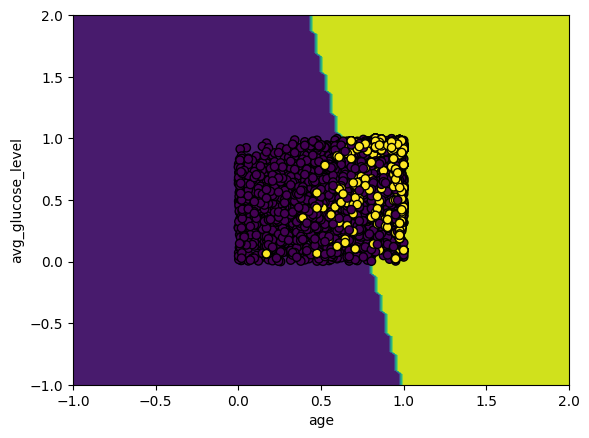

In [59]:
model1 = SVC(kernel='linear', C=1).fit(X_plot,y_train)

disp = DecisionBoundaryDisplay.from_estimator(model1, X_plot, xlabel="age" ,response_method="predict", ylabel="avg_glucose_level")
plt.scatter(X_plot['age'], X_plot["avg_glucose_level"], c=y_train, edgecolors='k')
plt.show()

- It is a straight line tries to separate classes using flat cut
- It doesn't work well because the data is not linearly separable

#### Display Polynomial Model

In [60]:
model2 = SVC(kernel='poly', degree=3, C=1)
model2.fit(X_plot, y_train)

SVC(C=1, kernel='poly')

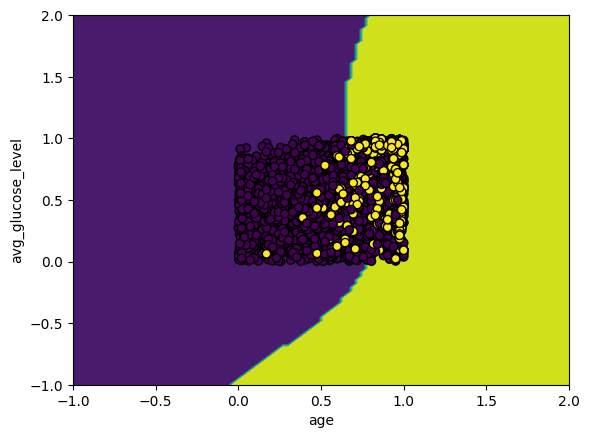

In [61]:
disp = DecisionBoundaryDisplay.from_estimator(model2, X_plot, xlabel="age" ,response_method="predict", ylabel="avg_glucose_level")
plt.scatter(X_plot['age'], X_plot["avg_glucose_level"], c=y_train,edgecolors='k')
plt.show()

- It is a curved line captures the non-linear releations.
- It is good and better than the linear separable but still it is not the best.

#### Display RBF Model

In [62]:
model3 = SVC(kernel='rbf', gamma=100, C=1)
model3.fit(X_plot, y_train)

SVC(C=1, gamma=100)

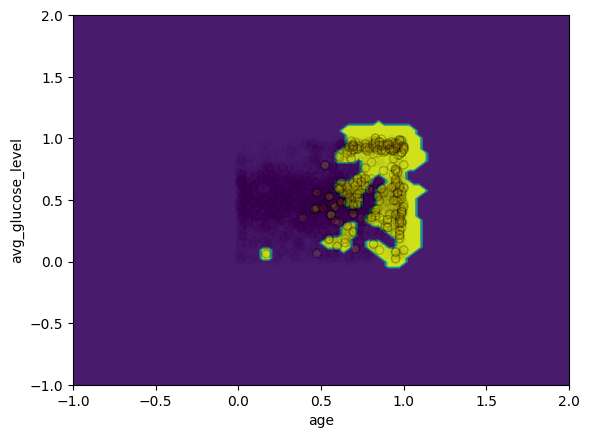

In [63]:
disp = DecisionBoundaryDisplay.from_estimator(model3, X_plot, xlabel="age" ,response_method="predict", ylabel="avg_glucose_level")
plt.scatter(X_plot['age'], X_plot["avg_glucose_level"], c=y_train,edgecolors='k', alpha=.01)
plt.show()

### Model Comparison

In [75]:
Summary_table = {
    "Model":["Accuracy", "f-score", "C", "Gamma", "Degree"],
    "Linear Model":[ .79,.77,1, np.nan, np.nan],
    "RBF Model": [.99, .99, np.nan, 100, np.nan],
    "Polynomial Model": [.91, .90, np.nan, np.nan, 8]
    
}
Summary=pd.DataFrame(Summary_table)

In [76]:
Summary

,Model,Linear Model,RBF Model,Polynomial Model
0,Accuracy,0.79,0.99,0.91
1,f-score,0.77,0.99,0.90
2,C,1.00,NaN,NaN
3,Gamma,NaN,100.00,NaN
4,Degree,NaN,NaN,8.00


- RBF kernel is the best model with highest test accuracy and highest train accuracy.